# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [8]:
raw_data = pd.read_csv('Categorical.csv')
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
5,Aland,19.953288,60.214887,Europe
6,Andorra,1.560544,42.542291,Europe
7,United Arab Emirates,54.300167,23.905282,Asia
8,Argentina,-65.179807,-35.381349,South America
9,Armenia,44.929933,40.289526,Asia


Remove the duplicate index column from the dataset. 

In [12]:
data = raw_data.copy()
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
5,Aland,19.953288,60.214887,Europe
6,Andorra,1.560544,42.542291,Europe
7,United Arab Emirates,54.300167,23.905282,Asia
8,Argentina,-65.179807,-35.381349,South America
9,Armenia,44.929933,40.289526,Asia


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [16]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'Africa': 0, 'Asia':1, 'Europe':2, 'North America': 3, 'Oceania': 4, 'South America': 5, 'Seven seas (open ocean)': 6, 'Antarctica': 7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,2
5,Aland,19.953288,60.214887,2
6,Andorra,1.560544,42.542291,2
7,United Arab Emirates,54.300167,23.905282,1
8,Argentina,-65.179807,-35.381349,5
9,Armenia,44.929933,40.289526,1


## Select the features

In [18]:
x = data_mapped.iloc[:,3:4]

## Clustering

Use 4 clusters initially.

In [20]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [22]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 1, 3, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 3, 1, 3, 3,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 3, 3, 1, 0, 1, 3, 3,
       3, 3, 2, 0, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 1, 2, 3, 0, 3, 3,
       1, 1, 3, 1, 2, 0, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 2, 2, 2,
       2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 3, 1, 1, 1,
       1, 2, 3, 1, 1, 3, 0, 2, 2, 1, 3, 1, 1, 1, 1, 2, 3, 3, 2, 0, 3, 1,
       3, 2, 3, 2, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 0, 0, 2, 3, 2, 1, 3,
       3, 2, 1, 3, 0, 1, 1, 1, 3, 2, 0, 1, 2, 3, 3, 1, 1, 1, 1, 2, 2, 3,
       1, 1, 3, 3, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 3, 3, 3])

In [26]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,3,2
1,Afghanistan,66.004734,33.835231,1,1
2,Angola,17.537368,-12.293361,0,3
3,Anguilla,-63.064989,18.223959,3,2
4,Albania,20.049834,41.142450,2,1
5,Aland,19.953288,60.214887,2,1
6,Andorra,1.560544,42.542291,2,1
7,United Arab Emirates,54.300167,23.905282,1,1
8,Argentina,-65.179807,-35.381349,5,0
9,Armenia,44.929933,40.289526,1,1


## Plot the data

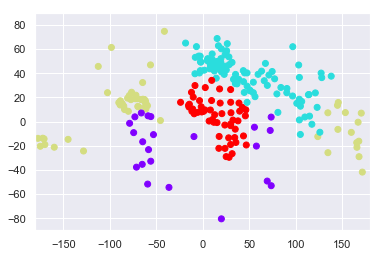

In [27]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.